In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("bestsellers with categories.csv")

print(df.head())
print(df.shape)

# Про скільки книг зберігає дані датасет?  550 (номерація від 0 до 549)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

na_counts = df.isna().sum()
print(na_counts)

# Чи є в якихось змінних пропуски? Ні, немає

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [6]:
unique_genres = df['genre'].unique()
print(unique_genres)

# Які є унікальні жанри? в колонці genre є 'Non Fiction' і 'Fiction'

['Non Fiction' 'Fiction']


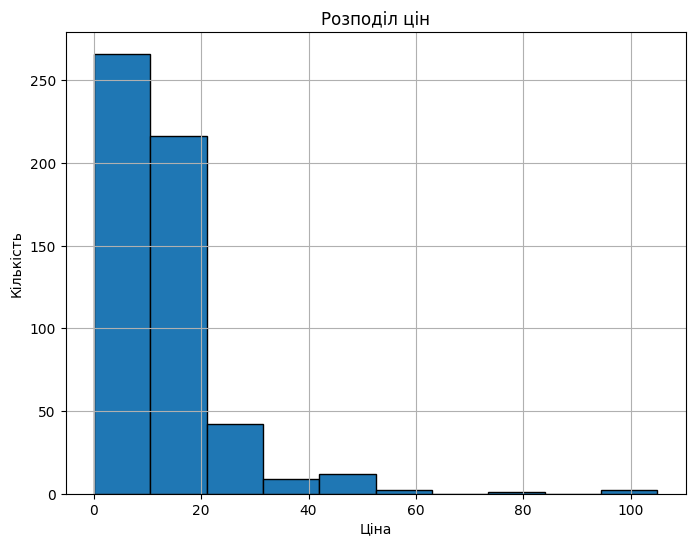

In [7]:
df['price'].plot(kind='hist', bins=10, edgecolor='black', figsize=(8, 6))
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.grid(True)
plt.show()

In [8]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")

# Максимальна ціна? 105
# Мінімальна ціна? 0
# Середня ціна? 13.1
# Медіанна ціна? 11.0

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [9]:
# Який рейтинг у датасеті найвищий? 4.9
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг: {max_rating}")

Найвищий рейтинг: 4.9


In [10]:
# Скільки книг мають такий рейтинг? 52
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Кількість книг з найвищим рейтингом ({max_rating}): {books_with_max_rating}")

Кількість книг з найвищим рейтингом (4.9): 52


In [11]:
# Яка книга має найбільше відгуків? Where the Crawdads Sing
book_with_most_reviews = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print(f"Книга з найбільшою кількістю відгуків: {book_with_most_reviews}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [12]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Publication Manual of the American Psychological Association, 6th Edition
top_50_2015 = df[(df['year'] == 2015) & (df['user_rating'] >= 4.5)].sort_values(by='price')
most_expensive_2015 = top_50_2015.iloc[-1]['name']
print(f"Найдорожча книга з Топ-50 у 2015 році: {most_expensive_2015}")

Найдорожча книга з Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


In [13]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? 16
fiction_top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction') & (df['user_rating'] >= 4.5)].shape[0]
print(f"Кількість книг жанру Fiction у Топ-50 у 2010 році: {fiction_top_50_2010}")

Кількість книг жанру Fiction у Топ-50 у 2010 році: 16


In [14]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? 1
rating_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {rating_4_9_2010_2011}")

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


In [15]:
#Яка книга остання у відсортованому списку?  Old School (Diary of a Wimpy Kid #10)
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_sorted = sorted_books_2015_under_8.iloc[-1]['name']
print(f"Остання книга у відсортованому списку: {last_book_sorted}")

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [16]:
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])

max_price_fiction = genre_prices.loc['Fiction', 'max']
min_price_fiction = genre_prices.loc['Fiction', 'min']

max_price_non_fiction = genre_prices.loc['Non Fiction', 'max']
min_price_non_fiction = genre_prices.loc['Non Fiction', 'min']

print(f"Максимальна ціна для жанру Fiction: {max_price_fiction}")
print(f"Мінімальна ціна для жанру Fiction: {min_price_fiction}")
print(f"Максимальна ціна для жанру Non Fiction: {max_price_non_fiction}")
print(f"Мінімальна ціна для жанру Non Fiction: {min_price_non_fiction}")

#Максимальна ціна для жанру Fiction: 82
#Мінімальна ціна для жанру Fiction: 0
#Максимальна ціна для жанру Non Fiction: 105
#Мінімальна ціна для жанру Non Fiction: 0

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


In [17]:
author_books_count = df.groupby('author')['name'].agg('count').reset_index()

print(author_books_count)

table_shape = author_books_count.shape
print(f"Розмірність таблиці: {table_shape}")

max_books_author = author_books_count[author_books_count['name'] == author_books_count['name'].max()]
max_books_author_name = max_books_author.iloc[0]['author']
max_books_count = max_books_author.iloc[0]['name']

print(f"Автор з найбільшою кількістю книг: {max_books_author_name}")
print(f"Кількість книг цього автора: {max_books_count}")

#Якої розмірності вийшла таблиця? 248, 2
#Який автор має найбільше книг? Jeff Kinney
#Скільки книг цього автора? 12

                         author  name
0              Abraham Verghese     2
1                Adam Gasiewski     1
2                 Adam Mansbach     1
3                     Adir Levy     1
4    Admiral William H. McRaven     1
..                          ...   ...
243             Walter Isaacson     3
244               William Davis     2
245            William P. Young     2
246            Wizards RPG Team     3
247                Zhi Gang Sha     2

[248 rows x 2 columns]
Розмірність таблиці: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


In [18]:
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').reset_index()

print(author_avg_rating)

min_avg_rating_author = author_avg_rating[author_avg_rating['user_rating'] == author_avg_rating['user_rating'].min()]
min_avg_rating_author_name = min_avg_rating_author.iloc[0]['author']
min_avg_rating = min_avg_rating_author.iloc[0]['user_rating']

print(f"Автор з мінімальним середнім рейтингом: {min_avg_rating_author_name}")
print(f"Середній рейтинг цього автора: {min_avg_rating}")

# У якого автора середній рейтинг мінімальний? Donna Tartt
# Який у цього автора середній рейтинг? 3.9

                         author  user_rating
0              Abraham Verghese     4.600000
1                Adam Gasiewski     4.400000
2                 Adam Mansbach     4.800000
3                     Adir Levy     4.800000
4    Admiral William H. McRaven     4.700000
..                          ...          ...
243             Walter Isaacson     4.566667
244               William Davis     4.400000
245            William P. Young     4.600000
246            Wizards RPG Team     4.800000
247                Zhi Gang Sha     4.600000

[248 rows x 2 columns]
Автор з мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9


In [20]:
combined_df = pd.concat([author_books_count, author_avg_rating['user_rating']], axis=1)
combined_df.columns = ['author', 'books_count', 'avg_rating']

sorted_df = combined_df.sort_values(by=['books_count', 'avg_rating'], ascending=[True, True])

first_author = sorted_df.iloc[0]['author']
print(f"Перший автор у списку: {first_author}")

# Який автор перший у списку? Muriel Barbery

Перший автор у списку: Muriel Barbery


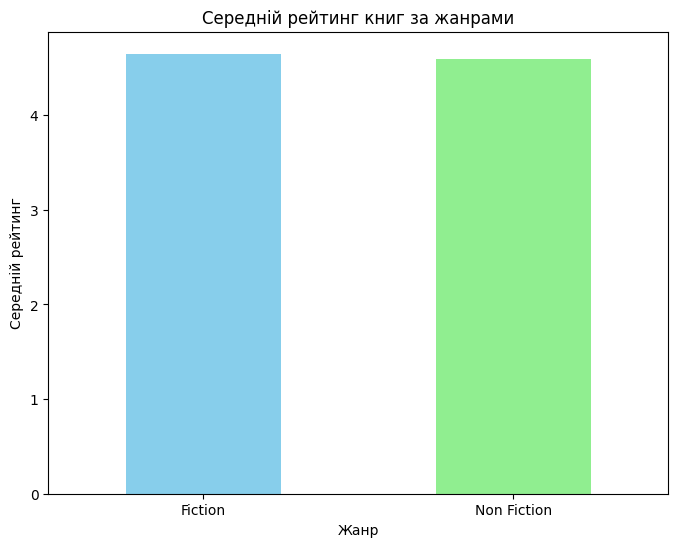

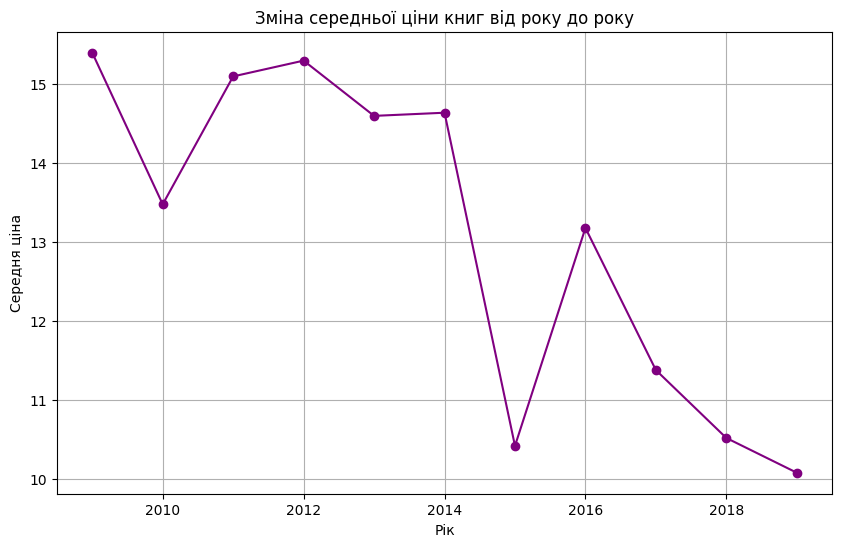

In [22]:
# Групування за жанром і підрахунок середнього рейтингу для кожного жанру
genre_avg_rating = df.groupby('genre')['user_rating'].agg('mean')

# Побудова стовпчикової діаграми
plt.figure(figsize=(8, 6))
genre_avg_rating.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Жанр')
plt.ylabel('Середній рейтинг')
plt.title('Середній рейтинг книг за жанрами')
plt.xticks(rotation=0)
plt.show()

# Групування за роком і підрахунок середньої ціни книг за кожен рік
yearly_avg_price = df.groupby('year')['price'].agg('mean')

# Побудова лінійного графіка
plt.figure(figsize=(10, 6))
yearly_avg_price.plot(kind='line', marker='o', color='purple')
plt.xlabel('Рік')
plt.ylabel('Середня ціна')
plt.title('Зміна середньої ціни книг від року до року')
plt.grid(True)
plt.show()
